In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=218993fcd5bfed9267582aec0558c6b9


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vestmannaeyjar
Processing Record 2 of Set 1 | cabo san lucas
Processing Record 3 of Set 1 | norman wells
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | chokurdakh
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | roma
Processing Record 9 of Set 1 | victoria
Processing Record 10 of Set 1 | kavieng
Processing Record 11 of Set 1 | takoradi
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | acarau
Processing Record 14 of Set 1 | castro
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | coihaique
Processing Record 19 of Set 1 | corvallis
Processing Record 20 of Set 1 | fairbanks
Processing Record 21 of Set 1 | new norfolk
Processing Record 22 of Set 1 | h

Processing Record 42 of Set 4 | east london
Processing Record 43 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 44 of Set 4 | quang ngai
Processing Record 45 of Set 4 | jalu
Processing Record 46 of Set 4 | rawannawi
City not found. Skipping...
Processing Record 47 of Set 4 | noumea
Processing Record 48 of Set 4 | salinas
Processing Record 49 of Set 4 | grottammare
Processing Record 50 of Set 4 | klaksvik
Processing Record 1 of Set 5 | labuhan
Processing Record 2 of Set 5 | pevek
Processing Record 3 of Set 5 | magdagachi
Processing Record 4 of Set 5 | marcona
City not found. Skipping...
Processing Record 5 of Set 5 | komsomolskiy
Processing Record 6 of Set 5 | garm
City not found. Skipping...
Processing Record 7 of Set 5 | cockburn harbour
City not found. Skipping...
Processing Record 8 of Set 5 | vardo
Processing Record 9 of Set 5 | sinnamary
Processing Record 10 of Set 5 | matara
Processing Record 11 of Set 5 | yomitan
City not found. Skipping...
Processing Reco

Processing Record 26 of Set 8 | yeniseysk
Processing Record 27 of Set 8 | lyuban
Processing Record 28 of Set 8 | juifang
City not found. Skipping...
Processing Record 29 of Set 8 | kavaratti
Processing Record 30 of Set 8 | huancavelica
Processing Record 31 of Set 8 | kerteh
City not found. Skipping...
Processing Record 32 of Set 8 | papara
Processing Record 33 of Set 8 | acapulco
Processing Record 34 of Set 8 | mareeba
Processing Record 35 of Set 8 | miri
Processing Record 36 of Set 8 | bambanglipuro
Processing Record 37 of Set 8 | hay river
Processing Record 38 of Set 8 | payakumbuh
Processing Record 39 of Set 8 | sola
Processing Record 40 of Set 8 | moose factory
Processing Record 41 of Set 8 | hauterive
Processing Record 42 of Set 8 | nador
Processing Record 43 of Set 8 | zaysan
Processing Record 44 of Set 8 | la mana
Processing Record 45 of Set 8 | cacoal
Processing Record 46 of Set 8 | amahai
Processing Record 47 of Set 8 | discovery bay
Processing Record 48 of Set 8 | mineiros
Pr

City not found. Skipping...
Processing Record 14 of Set 12 | codrington
Processing Record 15 of Set 12 | palmer
Processing Record 16 of Set 12 | mocsa
Processing Record 17 of Set 12 | kapit
Processing Record 18 of Set 12 | palizada
Processing Record 19 of Set 12 | midland
Processing Record 20 of Set 12 | sturgis
Processing Record 21 of Set 12 | tres arroyos
Processing Record 22 of Set 12 | monrovia
Processing Record 23 of Set 12 | lidkoping
Processing Record 24 of Set 12 | natal
Processing Record 25 of Set 12 | tacoronte
Processing Record 26 of Set 12 | pahrump
Processing Record 27 of Set 12 | kloulklubed
Processing Record 28 of Set 12 | tocache
Processing Record 29 of Set 12 | miles city
Processing Record 30 of Set 12 | madison
Processing Record 31 of Set 12 | sherlovaya gora
Processing Record 32 of Set 12 | idrinskoye
Processing Record 33 of Set 12 | pongpong
City not found. Skipping...
Processing Record 34 of Set 12 | oxford
Processing Record 35 of Set 12 | leningradskiy
Processing 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vestmannaeyjar,63.4427,-20.2734,25.07,62,0,25.30,IS,2021-04-08 22:58:35
1,Cabo San Lucas,22.8909,-109.9124,84.99,44,1,17.27,MX,2021-04-08 22:58:36
2,Norman Wells,65.2820,-126.8329,14.00,48,75,16.11,CA,2021-04-08 22:57:12
3,Chokurdakh,70.6333,147.9167,-2.58,86,99,6.15,RU,2021-04-08 22:57:33
4,Rikitea,-23.1203,-134.9692,76.64,63,15,2.13,PF,2021-04-08 22:57:11
5,Thompson,55.7435,-97.8558,53.60,30,40,11.50,CA,2021-04-08 22:57:27
6,Roma,43.2128,-75.4557,75.20,33,1,11.50,US,2021-04-08 22:58:40
7,Victoria,22.2855,114.1577,69.01,89,100,14.00,HK,2021-04-08 22:58:18
8,Kavieng,-2.5744,150.7967,80.62,82,100,9.95,PG,2021-04-08 22:58:47
9,Takoradi,4.8845,-1.7554,80.11,87,92,7.02,GH,2021-04-08 22:58:48


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]



In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vestmannaeyjar,IS,2021-04-08 22:58:35,63.4427,-20.2734,25.07,62,0,25.30
1,Cabo San Lucas,MX,2021-04-08 22:58:36,22.8909,-109.9124,84.99,44,1,17.27
2,Norman Wells,CA,2021-04-08 22:57:12,65.2820,-126.8329,14.00,48,75,16.11
3,Chokurdakh,RU,2021-04-08 22:57:33,70.6333,147.9167,-2.58,86,99,6.15
4,Rikitea,PF,2021-04-08 22:57:11,-23.1203,-134.9692,76.64,63,15,2.13
...,...,...,...,...,...,...,...,...,...
545,Yarada,IN,2021-04-08 23:02:36,17.6500,83.2667,80.60,89,40,3.44
546,Raudeberg,NO,2021-04-08 23:02:36,61.9875,5.1352,37.99,87,100,22.06
547,Hambantota,LK,2021-04-08 23:02:36,6.1241,81.1185,77.20,82,22,5.70
548,Savannah Bight,HN,2021-04-08 23:02:37,16.4500,-85.8500,86.00,70,20,5.75


In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

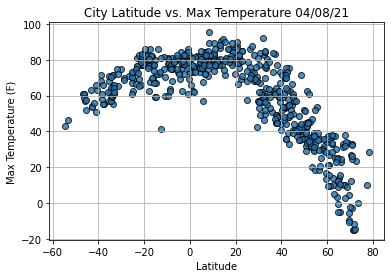

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

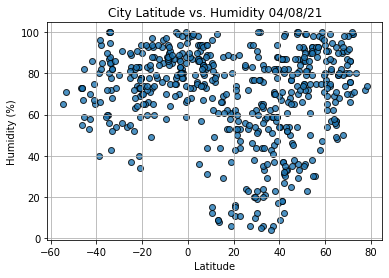

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

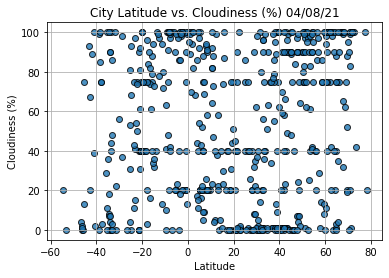

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

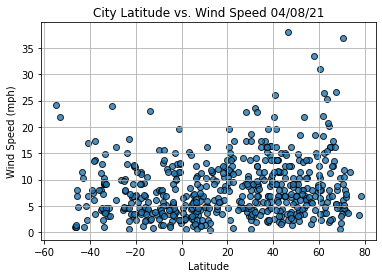

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f"The r-value is: {r_value**2}")
    print(f"The line_eq is: {line_eq}")
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                        Kapaa
Country                        US
Date          2021-04-08 22:57:37
Lat                       22.0752
Lng                      -159.319
Max Temp                     78.8
Humidity                       57
Cloudiness                      1
Wind Speed                  12.66
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4      False
       ...  
545     True
546     True
547     True
548     True
549     True
Name: Lat, Length: 550, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vestmannaeyjar,IS,2021-04-08 22:58:35,63.4427,-20.2734,25.07,62,0,25.30
1,Cabo San Lucas,MX,2021-04-08 22:58:36,22.8909,-109.9124,84.99,44,1,17.27
2,Norman Wells,CA,2021-04-08 22:57:12,65.2820,-126.8329,14.00,48,75,16.11
3,Chokurdakh,RU,2021-04-08 22:57:33,70.6333,147.9167,-2.58,86,99,6.15
5,Thompson,CA,2021-04-08 22:57:27,55.7435,-97.8558,53.60,30,40,11.50
...,...,...,...,...,...,...,...,...,...
545,Yarada,IN,2021-04-08 23:02:36,17.6500,83.2667,80.60,89,40,3.44
546,Raudeberg,NO,2021-04-08 23:02:36,61.9875,5.1352,37.99,87,100,22.06
547,Hambantota,LK,2021-04-08 23:02:36,6.1241,81.1185,77.20,82,22,5.70
548,Savannah Bight,HN,2021-04-08 23:02:37,16.4500,-85.8500,86.00,70,20,5.75


In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vestmannaeyjar,IS,2021-04-08 22:58:35,63.4427,-20.2734,25.07,62,0,25.30
1,Cabo San Lucas,MX,2021-04-08 22:58:36,22.8909,-109.9124,84.99,44,1,17.27
2,Norman Wells,CA,2021-04-08 22:57:12,65.2820,-126.8329,14.00,48,75,16.11
3,Chokurdakh,RU,2021-04-08 22:57:33,70.6333,147.9167,-2.58,86,99,6.15
5,Thompson,CA,2021-04-08 22:57:27,55.7435,-97.8558,53.60,30,40,11.50


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

The r-value is: 0.7590604193236861
The line_eq is: y = -1.07x + 94.56


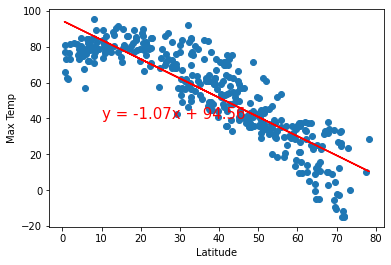

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

The r-value is: 0.4249545973117486
The line_eq is: y = 0.45x + 80.37


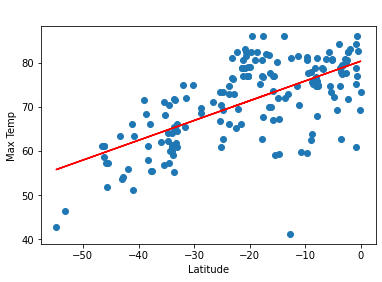

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

The r-value is: 0.015059773899645643
The line_eq is: y = 0.15x + 60.97


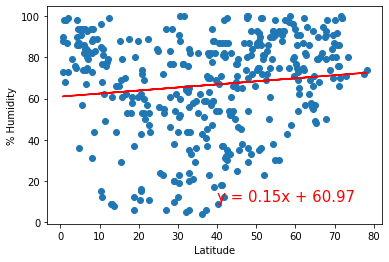

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

The r-value is: 0.09546411871143247
The line_eq is: y = 0.31x + 83.77


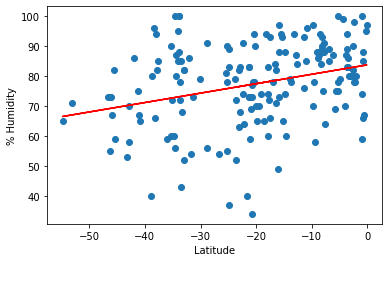

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

The r-value is: 0.04006296428190587
The line_eq is: y = 0.38x + 37.52


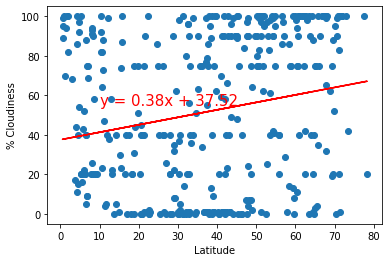

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))

The r-value is: 0.10217909129516344
The line_eq is: y = 0.87x + 72.98


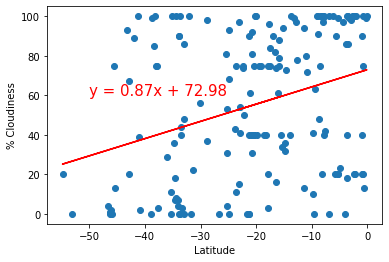

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for \n % Cloudiness', '% Cloudiness',(-50,60))

The r-value is: 0.03500572107502026
The line_eq is: y = 0.05x + 6.7


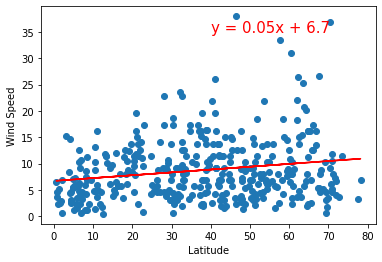

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

The r-value is: 0.008447946229862108
The line_eq is: y = -0.03x + 6.59


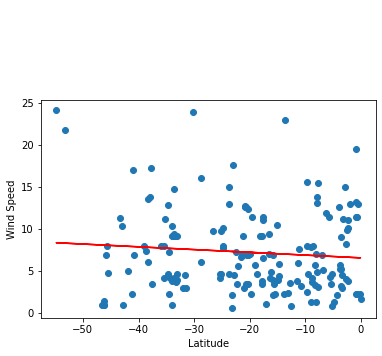

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))

